In [0]:
from fastai.vision import *
import pandas as pd
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [3]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
classes=["Bacterial_spot","Black_rot","brownspot","mosaic_virus","Powdery_mildew","rust","sun_burn"]

In [0]:
PATH=Path("/content/gdrive/My Drive/plant_doctor/disease_dataset/")

In [6]:
for c in classes:
    print(c)
    verify_images(PATH/c,delete=True)

Bacterial_spot


Black_rot


brownspot


mosaic_virus


Powdery_mildew


rust


sun_burn


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(PATH, train=".",valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

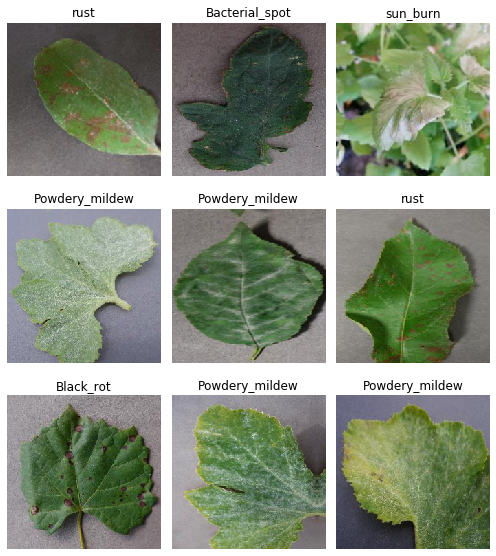

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Bacterial_spot',
  'Black_rot',
  'Powdery_mildew',
  'brownspot',
  'mosaic_virus',
  'rust',
  'sun_burn'],
 7,
 2116,
 529)

# Train Model

In [10]:
learn = cnn_learner(data, models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


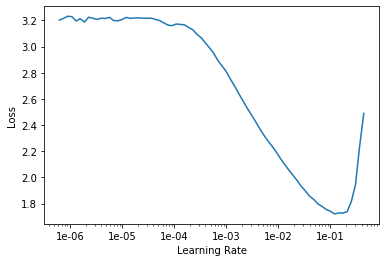

In [14]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(40, max_lr=slice(1e-2,1e-1/2))

epoch,train_loss,valid_loss,error_rate,time
0,0.824668,0.395174,0.122873,00:22
1,0.493186,0.279574,0.115312,00:22
2,0.392025,0.285092,0.105860,00:22
3,0.359786,0.351123,0.105860,00:22
4,0.366694,0.427724,0.117202,00:22
5,0.441250,0.428400,0.128544,00:22
6,0.471430,0.598324,0.175803,00:22
7,0.512604,1.291389,0.298677,00:22
8,0.512647,0.697048,0.156900,00:23
9,0.459397,0.298301,0.117202,00:22


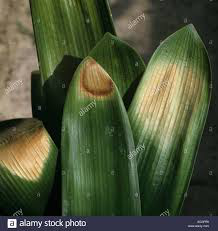

In [26]:
img=open_image("/content/gdrive/My Drive/plant_doctor/Peace_lily_sunburn4.jpg")
img

In [33]:
pred_class, pred_idx, outputs=learn.predict(img)
str(pred_class)

'sun_burn'

In [17]:
learn_model_dir='/content/gdrive/My Drive/plant_doctor/'
learn.save('disease_model',learn_model_dir)

pickle.dump(learn, open('/content/gdrive/My Drive/plant_doctor/disease_pickle.pkl'))

TypeError: ignored